# TABLE OF CONTENTS
### [OVERVIEW OF OSEMiNl](#OVERVIEW-OF-OSEMiN)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# PROCESS CHECKLIST

1. **OBTAIN:**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ]  Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

## Mod One Project Submission

Please fill out:
* Student name: John Lemaster
* Student pace: Online full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco & James Irving
* Blog post URL:

# OBTAIN

## Business Requirements
Lemaster Consulting has been engaged by Flips Inc. to research King County housing market to help them make better investment decisions on which properties to buy, rehab and resell for a profit.  Lemaster Consulting will do data research to recommend what which types of properties and more importantly which features have the most potential to increase profit margins.

In [4]:
%ls

CONTRIBUTING.md               kc_house_data.csv
LICENSE.md                    mod1_project_JMI-Copy1.ipynb
OSEMIN_scaffolding.ipynb      mod1_project_JMI.ipynb
README.md                     module1_project_rubric.pdf
Untitled.ipynb                student.ipynb
awesome.gif                   study_group_starter.ipynb
column_names.md               untitled


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline
inline_rc = dict(mpl.rcParams)

plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test

from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [92]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [93]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

#### Review column labels and make sure understand them.  Saved label names & descriptions below.

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Inspect Data

#### Removed view and yr_renovated columns because of insufficient data and those features/columns don't affect desired technical & business outcomes.

In [95]:
df.drop(['view', 'yr_renovated'], axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [41]:
print(len(df))

21597


In [42]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Cleansing

#### Start already by looking for numbers "stored" as Objects (see above). There are two: date and sqft_basement. I am highly considering removing date column because I don’t think it will be important for any of my data models for this project. Let's explore sqft_basement to decide to keep this feature or to convert from object and to clean the data/obsevations of placeholders and null values.

In [43]:
df['sqft_basement']

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             ?
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            ?
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         ?
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

#### There's a lot of useless data in the sqft_basement column and poor correlations for project outcomes; therefore, removing this column.

In [44]:
df.drop(['sqft_basement'], axis=1, inplace=True)

#### Removing columns based upon domain knowledge (see below for the columns).  These will not be features to help with model predictions

In [45]:
df.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,1800,7503


#### Next, I will "look for" null values & decide how to manage them.

In [46]:
nulls = df.isna().sum()
print(nulls[nulls > 0])  # viewing just the null columns so not viewing a long list like above

waterfront    2376
dtype: int64


In [47]:
(nulls[nulls > 0])/len(df.index)  #What percentage of the data in null columns

waterfront    0.110015
dtype: float64

#### Since it is just shy of 10% of null data, then removing the null rows.

In [48]:
df.dropna(subset= ['waterfront'], inplace=True)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### All null values have been removed (see above).

#### More data cleaning:  bedrooms has an observation that is 33.  Will remove that outlier.

In [49]:
idx_bedrooms = df.loc[df['bedrooms']>10].index
idx_bedrooms
df.drop(idx_bedrooms,axis=0,inplace=True)
df.loc[df['bedrooms']>10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15


In [50]:
df.isna().sum() #One last search for NaN values.

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [51]:
df.waterfront.unique()

array([0., 1.])

# EXPLORE

### Overview Visulizations for Distribution of Data

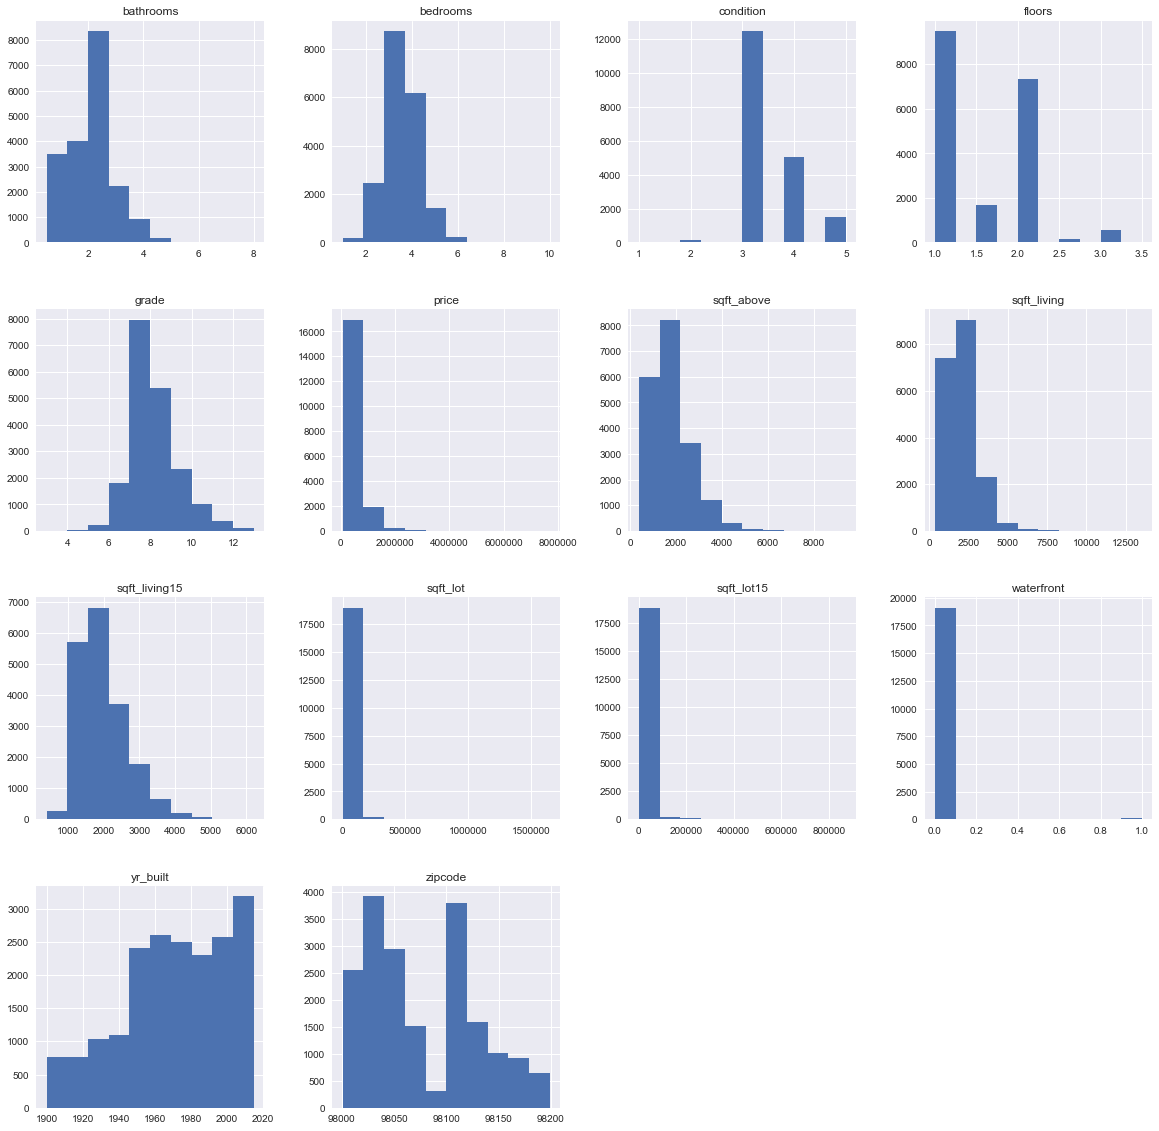

In [52]:
df.hist(figsize=(20,20)); 

#### A quick observation of the distribution of data:  grade, bedrooms & sqft_living15 columns/features could be good areas to focus where to invest to find the best homes to "flip."

### Multicollinearity

#### Starting thinking/pondering which features could have multicollinearity with a heat-map.

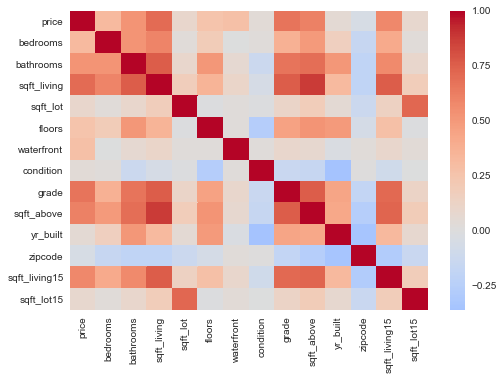

In [53]:
sns.heatmap(df.corr(), cmap='coolwarm', center=0,);

In [54]:
df.corr().round(2)  # A multicollinearity quickview

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.00,0.32,0.53,0.70,0.09,0.26,0.28,0.04,0.67,0.61,0.05,-0.05,0.58,0.08
bedrooms,0.32,1.00,0.53,0.60,0.03,0.19,-0.00,0.02,0.37,0.50,0.16,-0.16,0.41,0.03
bathrooms,0.53,0.53,1.00,0.76,0.09,0.51,0.07,-0.13,0.67,0.69,0.51,-0.20,0.57,0.09
sqft_living,0.70,0.60,0.76,1.00,0.17,0.36,0.11,-0.06,0.76,0.88,0.32,-0.20,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.18,0.06,-0.13,0.15,0.72
floors,0.26,0.19,0.51,0.36,-0.01,1.00,0.02,-0.26,0.46,0.53,0.49,-0.06,0.28,-0.01
waterfront,0.28,-0.00,0.07,0.11,0.02,0.02,1.00,0.02,0.09,0.08,-0.03,0.03,0.09,0.03
condition,0.04,0.02,-0.13,-0.06,-0.01,-0.26,0.02,1.00,-0.14,-0.16,-0.36,0.00,-0.09,-0.01
grade,0.67,0.37,0.67,0.76,0.11,0.46,0.09,-0.14,1.00,0.76,0.45,-0.18,0.71,0.12
sqft_above,0.61,0.50,0.69,0.88,0.18,0.53,0.08,-0.16,0.76,1.00,0.42,-0.26,0.73,0.19


#### Find where multicollinearity is to high (greater than 75%) to remove redundant features.

In [55]:
#function for visualization of multicollinearity with detials both nemerical and as a heatmap.

def multiplot(df,annot=True,fig_size=None):
    """EDA: Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    import seaborn as sns
    sns.set(style="white")
    from string import ascii_letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    # Set up the matplotlib figure
    if fig_size==None:
        figsize=(16,16)
    else:
        figsize = fig_size

    f, ax = plt.subplots(figsize=(figsize))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=annot, cmap=cmap, center=0,

    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax


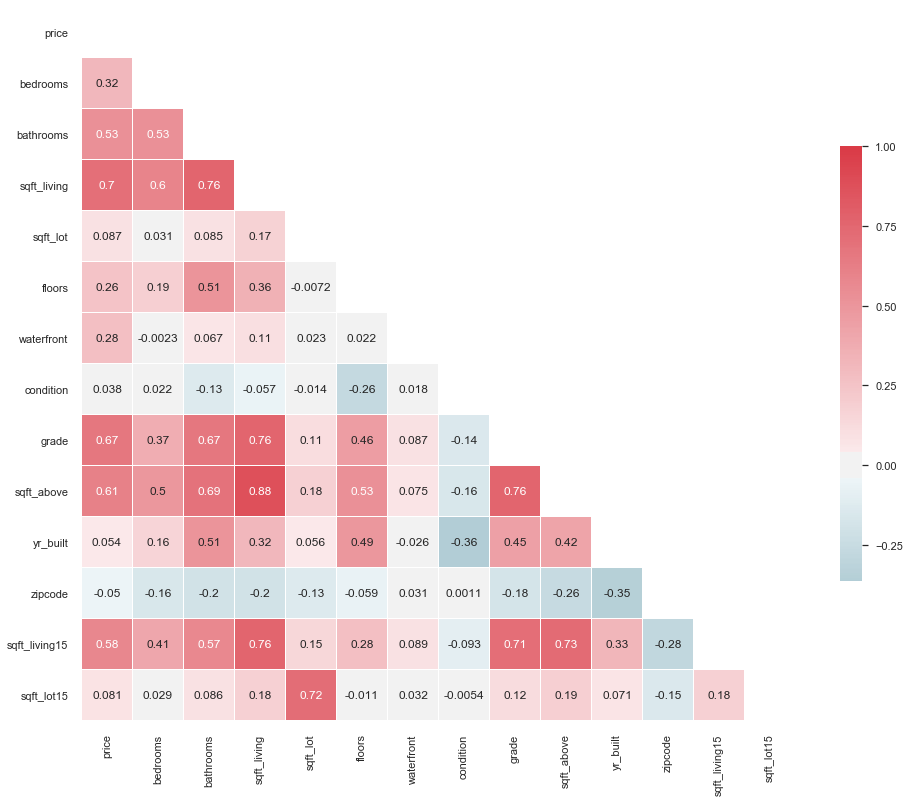

In [56]:
multiplot(df,annot=True,fig_size=None);

#### Next, remove columns that have too high of multicollinearity (greater than .75).  See above chart for reference of those columns.

In [96]:
df.drop(['sqft_above', 'grade'], axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,0.0,1987,98074,47.6168,-122.045,1800,7503


### Linear Regression Graphical Analysis (by each Feature)

In [97]:
def dist_reg_plot(df,feature_col,target_col='price',figsize=(10,4)):
    """Plots a seaborn distplot for the feature_col column in df,
    and a seaborn regplot of feature_col vs target_col."""
    ## Create fig and ax as side by side subplots (ncols=2)
    import matplotlib.pyplot as plt 
    import seaborn as sns
    fig, ax = plt.subplots(ncols=2,figsize=figsize)
    
    
    # SUBPLOT 1: histogram+kde
    sns.distplot(df[feature_col], label=feature_col, ax=ax[0])
   
    
    # SUBPLOT 2: scatter+line plot
    sns.regplot(data=df,x=feature_col,y=target_col,ax=ax[1])
    
    plt.tight_layout()
    plt.suptitle(f"Column: {feature_col}",y=1.05)

In [98]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

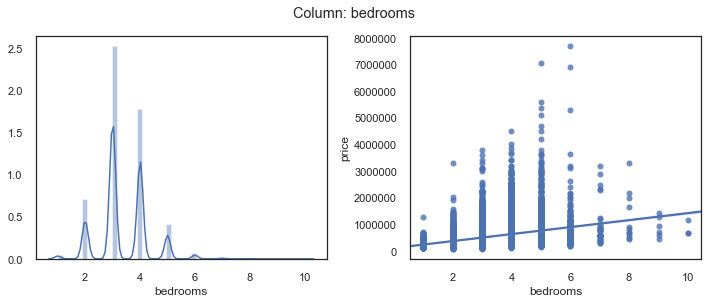

In [39]:
dist_reg_plot(df, 'bedrooms')

#### Observations:  bedrooms
More bedrooms more price.

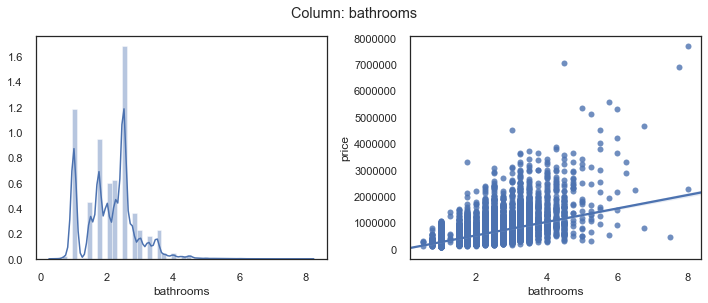

In [46]:
dist_reg_plot(df, 'bathrooms')

#### Observations: bathrooms
more bathrooms more price but after 3 doesn't matter as much. 

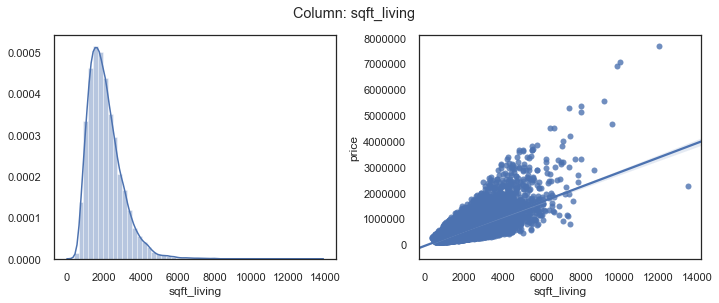

In [47]:
dist_reg_plot(df, 'sqft_living')

#### Observations: sqft_living        
Overall really like this feature.  The first skew is not perfect but does show square feet correlates to price and the second graph has a blob at the regression line.  

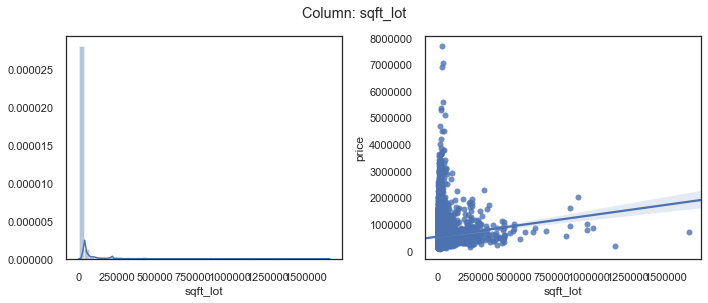

In [48]:
dist_reg_plot(df, 'sqft_lot')

#### Observations: sqft_lot       
Remove this feature.

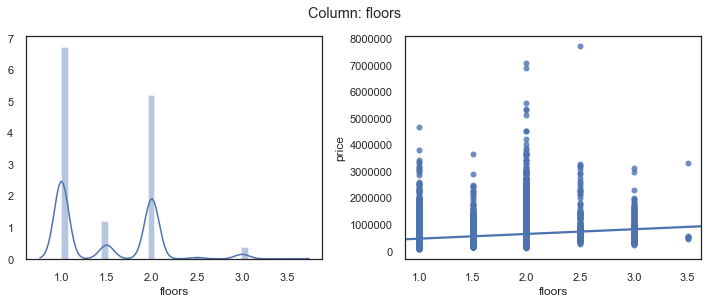

In [50]:
dist_reg_plot(df, 'floors')

#### Observations:  floors
Overall interpretation is that floors don't matter enough to "drive the price up."  Remove this feature.

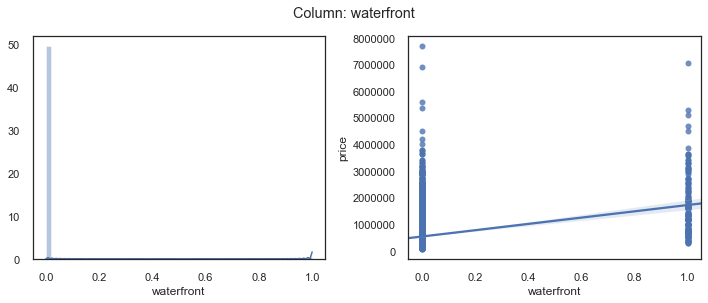

In [51]:
dist_reg_plot(df, 'waterfront')

#### Observations:  waterfront
Cannot interrupt any meaningful knowledge from these graphs.  

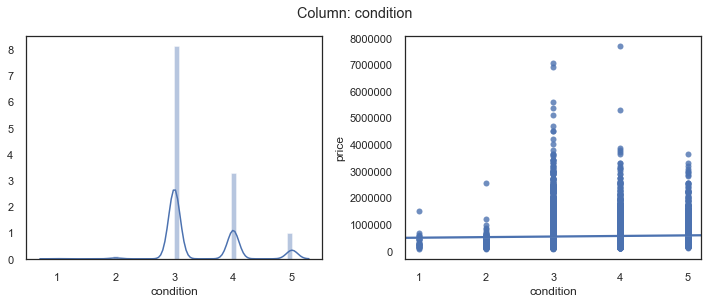

In [52]:
dist_reg_plot(df, 'condition')

#### Observations:  condition
Care most about condition of 3 & 4.  

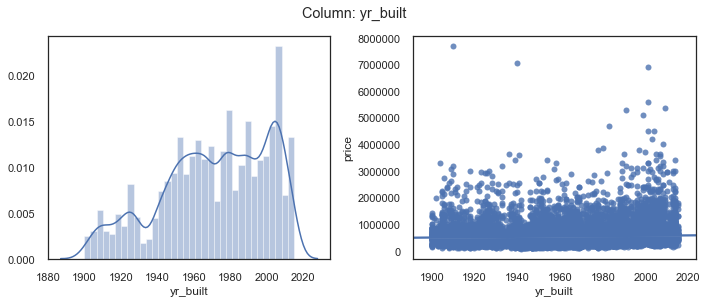

In [53]:
dist_reg_plot(df, 'yr_built')

#### Observations:  yr_built
It seems like homes built after 1950 is a "good start" but there are considerable volatility in price after that timeframe.  Perhaps also could focus on homes built in the last 20 years.  

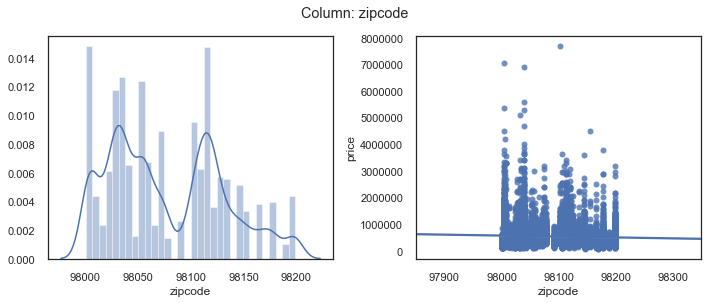

In [54]:
dist_reg_plot(df, 'zipcode')

#### Observations:  zipcode
It's clear there are zip codes that have a much higher price than others.

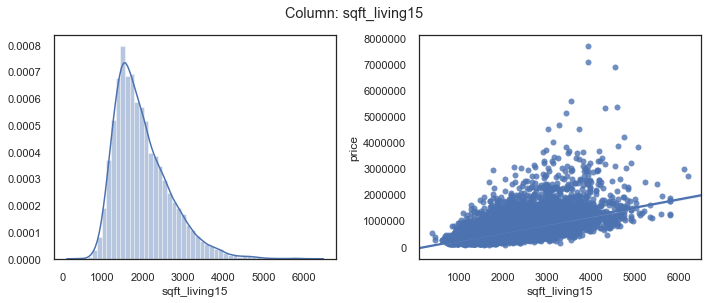

In [56]:
dist_reg_plot(df, 'sqft_living15')

#### Observations:  sqft_living15
There are some definitely some outliers but both graphs drive price.  A great feature. 

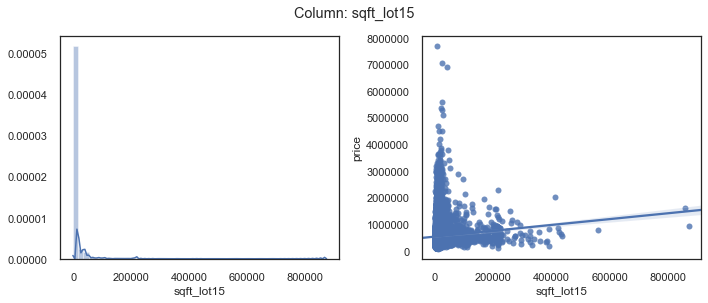

In [57]:
dist_reg_plot(df, 'sqft_lot15')

#### Observations:  sqft_lot15
Remove this feature.

#### Based on observations remove the follwing features/columns: sqft_living, floors & sqft_lot15

In [99]:
df.drop(['sqft_living', 'floors', 'sqft_lot15', 'yr_built'], axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,waterfront,condition,sqft_basement,zipcode,lat,long,sqft_living15
0,7129300520,10/13/2014,221900.0,3,1.00,5650,NaN,3,0.0,98178,47.5112,-122.257,1340
1,6414100192,12/9/2014,538000.0,3,2.25,7242,0.0,3,400.0,98125,47.7210,-122.319,1690
2,5631500400,2/25/2015,180000.0,2,1.00,10000,0.0,3,0.0,98028,47.7379,-122.233,2720
3,2487200875,12/9/2014,604000.0,4,3.00,5000,0.0,5,910.0,98136,47.5208,-122.393,1360
4,1954400510,2/18/2015,510000.0,3,2.00,8080,0.0,3,0.0,98074,47.6168,-122.045,1800


### OLS Model

A quick view of the OLS model to look at some of the results of the EDA (Exploratory Data Analysis) 

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
f = 'price~C(bedrooms)+C(bathrooms)+C(zipcode)'
model = ols(formula=f, data=df).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:07:11   Log-Likelihood:            -2.6414e+05
No. Observations:               19219   AIC:                         5.285e+05
Df Residuals:                   19112   BIC:                         5.293e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.456e+04   1.15e+05      0.563      0.573    -1.6e+05    2.89e+05
C(bedrooms)[T.2]      2.156e+04   1.82e+04      1.186      0.236   -1.41e+04    5.72e+04
C(bedrooms)[T.3]      5.205e+04   1.81e+04      2.879      0.004    1.66e+04    8.75e+04
C(bedrooms)[T.4]      1.126e+05   1.83e+04      6.141      0.000    7.67e+04    1.49e+05
C(bedrooms)[T.5]      1.112e+05   1.92e+04      5.785      0.000    7.35e+04    1.49e+05
C(bedrooms)[T.6]      5.538e+04   2.39e+04      2.320      0.020    8592.128    1.02e+05
C(bedrooms)[T.7]     -2.569e+05   4.34e+04     -5.917      0.000   -3.42e+05   -1.72e+05
C(bedrooms)[T.8]     -6.477e+04   7.16e+04     -0.905      0.366   -2.05e+05    7.55e+04
C(bedrooms)[T.9]     -1.909e+05   1.04e+05     -1.839      0.066   -3.94e+05    1.26e+04
C(bedrooms)[T.10]    -3.907e+05   1.34e+05     -2.916      0.004   -6.53e+05   -1.28e+05
C(bathrooms)[T.0.75]  3.167e+04   1.17e+05      0.272      0.786   -1.97e+05     2.6e+05
C(bathrooms)[T.1.0]   3.948e+04   1.13e+05      0.349      0.727   -1.82e+05    2.61e+05
C(bathrooms)[T.1.25]  1.904e+05   1.39e+05      1.375      0.169   -8.11e+04    4.62e+05
C(bathrooms)[T.1.5]   6.721e+04   1.13e+05      0.593      0.553   -1.55e+05    2.89e+05
C(bathrooms)[T.1.75]  9.874e+04   1.13e+05      0.872      0.383   -1.23e+05    3.21e+05
C(bathrooms)[T.2.0]   1.017e+05   1.13e+05      0.897      0.370    -1.2e+05    3.24e+05
C(bathrooms)[T.2.25]  1.495e+05   1.13e+05      1.319      0.187   -7.27e+04    3.72e+05
C(bathrooms)[T.2.5]   2.031e+05   1.13e+05      1.793      0.073   -1.89e+04    4.25e+05
C(bathrooms)[T.2.75]  2.417e+05   1.13e+05      2.130      0.033    1.93e+04    4.64e+05
C(bathrooms)[T.3.0]   2.869e+05   1.14e+05      2.526      0.012    6.43e+04     5.1e+05
C(bathrooms)[T.3.25]  4.876e+05   1.14e+05      4.289      0.000    2.65e+05     7.1e+05
C(bathrooms)[T.3.5]    4.51e+05   1.14e+05      3.970      0.000    2.28e+05    6.74e+05
C(bathrooms)[T.3.75]  6.384e+05   1.15e+05      5.555      0.000    4.13e+05    8.64e+05
C(bathrooms)[T.4.0]   7.767e+05   1.15e+05      6.744      0.000    5.51e+05       1e+06
C(bathrooms)[T.4.25]  9.338e+05   1.16e+05      8.026      0.000    7.06e+05    1.16e+06
C(bathrooms)[T.4.5]   8.447e+05   1.16e+05      7.293      0.000    6.18e+05    1.07e+06
C(bathrooms)[T.4.75]   1.41e+06   1.23e+05     11.438      0.000    1.17e+06    1.65e+06
C(bathrooms)[T.5.0]   1.246e+06   1.26e+05      9.889      0.000    9.99e+05    1.49e+06
C(bathrooms)[T.5.25]  1.125e+06   1.33e+05      8.472      0.000    8.65e+05    1.39e+06
C(bathrooms)[T.5.5]   1.867e+06   1.34e+05     13.923      0.000     1.6e+06    2.13e+06
C(bathrooms)[T.5.75]  1.995e+06   1.74e+05     11.487      0.000    1.65e+06    2.33e+06
C(bathrooms)[T.6.0]   2.123e+06   1.47e+05     14.462    

#### Have made very good progress.  R Squared is above .75 for the features that will affect the prices of homes to invest.  

# MODEL

### Model: Recursive Feature Elimination (RFE) 

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)

Y = df['price']  # Dependant variable
X = df.drop('price', axis=1)  #features to compare (and independant variable)

#Scaling the data...making sure that the data is on the same scale
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

linreg.fit(scaled_data, Y)  # "run" the model to scale the data

selector = selector.fit(X,Y)

In [64]:
selector.ranking_

array([4, 2, 8, 1, 3, 5, 6, 7])

In [65]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'condition',
       'yr_built', 'zipcode', 'sqft_living15'],
      dtype='object')

In [66]:
ranking = dict(zip(X.columns, selector.ranking_))  # creating view of features rank
ranking

{'bedrooms': 4,
 'bathrooms': 2,
 'sqft_lot': 8,
 'waterfront': 1,
 'condition': 3,
 'yr_built': 5,
 'zipcode': 6,
 'sqft_living15': 7}

In [67]:
df_rank = pd.DataFrame({'features' : X.columns, 'rank' : selector.ranking_})
df_rank.sort_values('rank')

,features,rank
3,waterfront,1
1,bathrooms,2
4,condition,3
0,bedrooms,4
5,yr_built,5
6,zipcode,6
7,sqft_living15,7
2,sqft_lot,8


#### Top 5 features:
1. waterfront
2. bathrooms
3. condition
4. bedrooms
5. zipcode

In [82]:
f2 = 'price~waterfront'
model_2 = ols(formula=f2, data=df).fit()

#### Let's "look at" R-squared (as well as other regression results) of price ~ waterfront features.

In [83]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:54:41   Log-Likelihood:            -2.7304e+05
No. Observations:               19219   AIC:                         5.461e+05
Df Residuals:                   19217   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.326e+05   2590.668    205.598      0.000    5.28e+05    5.38e+05
waterfront  1.185e+06   2.97e+04     39.853      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16091.155   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894125.295
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.588   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Great!  Have meet the threshold of .75 

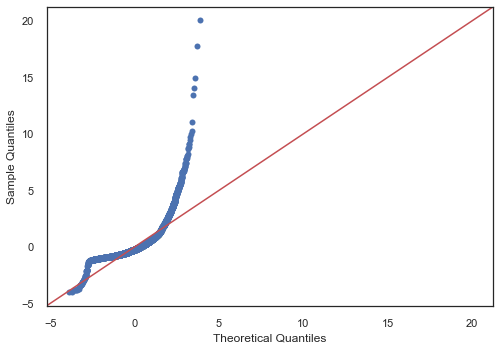

In [78]:
import statsmodels.api as sma
import scipy.stats as stats
residuals = model_2.resid
fig = sma.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The QQ Plot shows its a normal distribution ("kind-of") with a positive skew

In [85]:
f3 = 'price~bathrooms'
model_3 = ols(formula=f3, data=df).fit()

#### Let's "look at" R-squared (as well as other regression results) of price ~ bathrooms features.

In [86]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     7404.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:59:49   Log-Likelihood:            -2.7067e+05
No. Observations:               19219   AIC:                         5.413e+05
Df Residuals:                   19217   BIC:                         5.414e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1562.5226   6678.261      0.234      0.815   -1.15e+04    1.47e+04
bathrooms   2.551e+05   2964.717     86.048      0.000    2.49e+05    2.61e+05
==============================================================================
Omnibus:                    15603.306   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           837738.736
Skew:                           3.525   Prob(JB):                         0.00
Kurtosis:                      34.567   Cond. No.                         7.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Above doesn't meet our R-squared threshold

#### Let's "look at" R-squared (as well as other regression results) of price ~ condition features.

In [88]:
f4 = 'price~condition'
model_4 = ols(formula=f4, data=df).fit()

In [89]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     27.80
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           1.36e-07
Time:                        15:01:55   Log-Likelihood:            -2.7379e+05
No. Observations:               19219   AIC:                         5.476e+05
Df Residuals:                   19217   BIC:                         5.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.674e+05   1.43e+04     32.627      0.000    4.39e+05    4.96e+05
condition   2.176e+04   4127.111      5.273      0.000    1.37e+04    2.99e+04
==============================================================================
Omnibus:                    17350.965   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1098766.303
Skew:                           4.135   Prob(JB):                         0.00
Kurtosis:                      39.107   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Doesn't meet our threshold.   

# iNTERPRET

#### We started our data management process by reviewing 18 features that could possibly affect the value of homes.  After deploying a rigorous approach of researching these data types, we have have concluded that your staff should only focus on six of these housing features; thereby, reducing your data research efforts by more than 50%.  

#### Our interpretations have found that many of these features produce the same result sets. In addition, some of the features have very little to no affect on housing prices. 

# CONCLUSIONS & RECOMMENDATIONS

#### We recommend that you focus your staff ’s valuable time and efforts as well as your investments dollars on the following features for the homes you purchase:

Waterfront views
Number of bathrooms
The condition of the homes
Number of bedrooms
Where the homes are located by top zip codes
The living area square footage

In addition, those above features are the improvements for your buy low and rehab homes business plan.  You should try to find homes where there is wasted living space.  You can reconfigure them to add more bedrooms, bathrooms (if needed) and to make more living space area. 

By following our recommendations your staff will stop wasting time searching for investment properties that will NOT yield the highest profit margins.  They will now be able to focus on finding the best properties and wisely investing into those housing features that people will buy. 


